# Network analysis

Using network analysis we can attempt to map relations between different entities - in this case company names.

We will use the `pandas` and `nltk` libraries for the data preparation.

In [1]:
import pandas as pd
import nltk

## Data preparation

First, we load the dataset.

In [2]:
df = pd.read_csv('data/cookies.csv')

We remove the rows with no policy text.

In [3]:
df = df.dropna(subset='policy_text')

We then use `set` to create a list of unique providers. Only names with more than two characters are included.

In [4]:
providers = set(df[df['provider'].str.len() > 2]['provider'])

We create a new column with tokenized policy texts by mapping NLTK's `word_tokenize` function to `policy_texts`.

In [5]:
df['policy_tokens'] = df['policy_text'].map(lambda x: nltk.word_tokenize(x))

We then define a function for detecting connections between providers in the text (edges).

In [6]:
def get_edges(row, providers=providers):
    edges = []

    for word in row['policy_tokens']:
        if word in providers and word != row['provider']:
            edges.append(word)
    if edges:
        return edges
    return None

We *apply* the function to the DataFrame.

In [7]:
df['edges'] = df.apply(lambda row: get_edges(row), axis=1)

Then we create a new DataFrame with providers and edges - excluding those providers with no edges.

In [8]:
edge_df = df[~df['edges'].isnull()][['provider', 'edges']]

Finally, we convert the DataFrame to a list of tuples. Each tuple represents an edge between two providers.

In [9]:
edges = []
for p, e in zip(edge_df['provider'], edge_df['edges']):
    for i in e:
        edges.append((p, i))

## Visualising the network

Now the data are prepared for network analysis and we can start creating a graph.

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

After importing the necessary libraries, we create an empty graph and add the edges.

In [11]:
G = nx.Graph()

G.add_edges_from(edges)

Optionally we can set the figure size before drawing the graph.

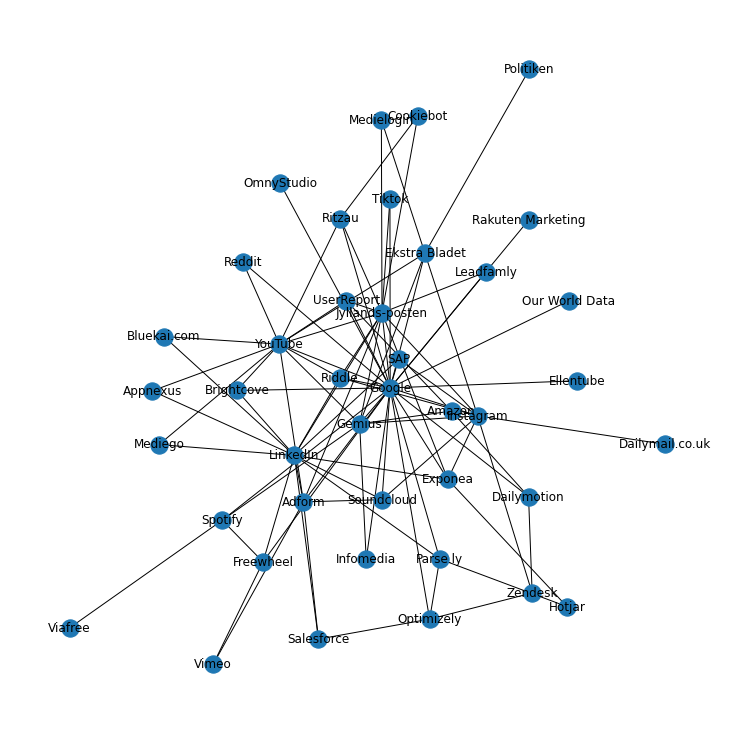

In [12]:
plt.figure(figsize=(10, 10))

nx.draw(G, with_labels=True)

plt.show()

The visualisation can be tweaked in different ways and we can also make it interactive within the notebook using `%matplotlib notebook`.